>Load packages

In [202]:
# foundation packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold

Load csv into a pandas data frame: set header to 1 because in the csv 0 contains descriptions for the columns. Set index_col to 1 because in the csv 0 contains row ids.

In [203]:
pslt = pd.read_csv('/Users/jAir/Desktop/PsalterData2.2.csv', header = 1, index_col=1)

>Select rows that are complete

In [35]:
pslt = pslt.loc[pslt['Complete'] == 1]

In [37]:
pslt.head()

,2,Label_Origin,Label_Location,Orig_Lat,Orig_Long,Orig_Region,Date_Early,Date_Late,VirgChrist,GeezFidel,...,CaluMarks,CaluSum,QuireNos,Mirrors,Seals,Covers,Cloth,Strap,Coder,Complete
ID_1,,,,,,,,,,,,,,,,,,,,,
Berlin Or 172,3.0,NaN,NaN,NaN,NaN,NaN,1400.0,1499.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0
Beta Metsahaf BGV-008,4.0,NaN,NaN,NaN,NaN,NaN,1900.0,1974.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Steve,1.0
Beta Metsahaf MNC-002,5.0,NaN,NaN,NaN,NaN,NaN,1900.0,1974.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Steve,1.0
Beta Metsahaf MNC-015,6.0,NaN,NaN,NaN,NaN,NaN,1800.0,1849.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,Steve,1.0
Beta Metsahaf MNC-017,7.0,NaN,NaN,NaN,NaN,NaN,1800.0,1899.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,Steve,1.0


>Select columns for analysis

In [38]:
pslt = pslt[[
 'Orig_Region',
 'Date_Early',
 'VirgChrist',
 'GeezFidel',
 'RubGod',
 'RubMary',
 'MaryDay',
 'Col28',
 'Col148',
 'Col150',
 'ColCant10',
 'Midpoint',
 'CaluMarks',
 'CaluSum',
 'QuireNos',
 'Mirrors',
 'Seals',
 'Covers',
 'Cloth',
 'Strap',
 ]]

>change column names to make them easier to code

In [39]:
pslt.columns = [[
 'region',
 'date',
 'virgchrist',
 'geezfidel',
 'rubgod',
 'rubmary',
 'maryday',
 'col28',
 'col148',
 'col150',
 'colcant10',
 'midpoint',
 'calumarks',
 'calusum',
 'quirenos',
 'mirrors',
 'seals',
 'covers',
 'cloth',
 'strap',
 ]]

In [40]:
pslt.head()

,region,date,virgchrist,geezfidel,rubgod,rubmary,maryday,col28,col148,col150,colcant10,midpoint,calumarks,calusum,quirenos,mirrors,seals,covers,cloth,strap
ID_1,,,,,,,,,,,,,,,,,,,,
Berlin Or 172,NaN,1400.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Beta Metsahaf BGV-008,NaN,1900.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Beta Metsahaf MNC-002,NaN,1900.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Beta Metsahaf MNC-015,NaN,1800.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
Beta Metsahaf MNC-017,NaN,1800.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


>Describe data

In [44]:
pslt.describe()

,date,virgchrist,geezfidel,rubgod,rubmary,maryday,col28,col148,col150,colcant10,midpoint,calumarks,calusum,quirenos,mirrors,seals,covers,cloth,strap
count,748.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,1764.372995,0.089096,0.059840,0.388298,0.909574,0.953457,0.061170,0.097074,0.470745,0.585106,1.051862,0.276596,0.041223,0.361702,0.074468,0.265957,1.323138,0.252660,0.034574
std,129.028856,0.298756,0.237349,0.615617,0.286981,0.360077,0.239802,0.296256,0.499476,0.493032,1.406177,0.685078,0.241285,0.480813,0.262706,0.442136,0.750035,0.434827,0.182821
min,1350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1700.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1800.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1900.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
max,1963.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


>This data contains two potential target variables: Orig_Region (categorical) and Date_early (Continuous). All other variables are categorical.

In [61]:
list(pslt)

['region',
 'date',
 'virgchrist',
 'geezfidel',
 'rubgod',
 'rubmary',
 'maryday',
 'col28',
 'col148',
 'col150',
 'colcant10',
 'midpoint',
 'calumarks',
 'calusum',
 'quirenos',
 'mirrors',
 'seals',
 'covers',
 'cloth',
 'strap']

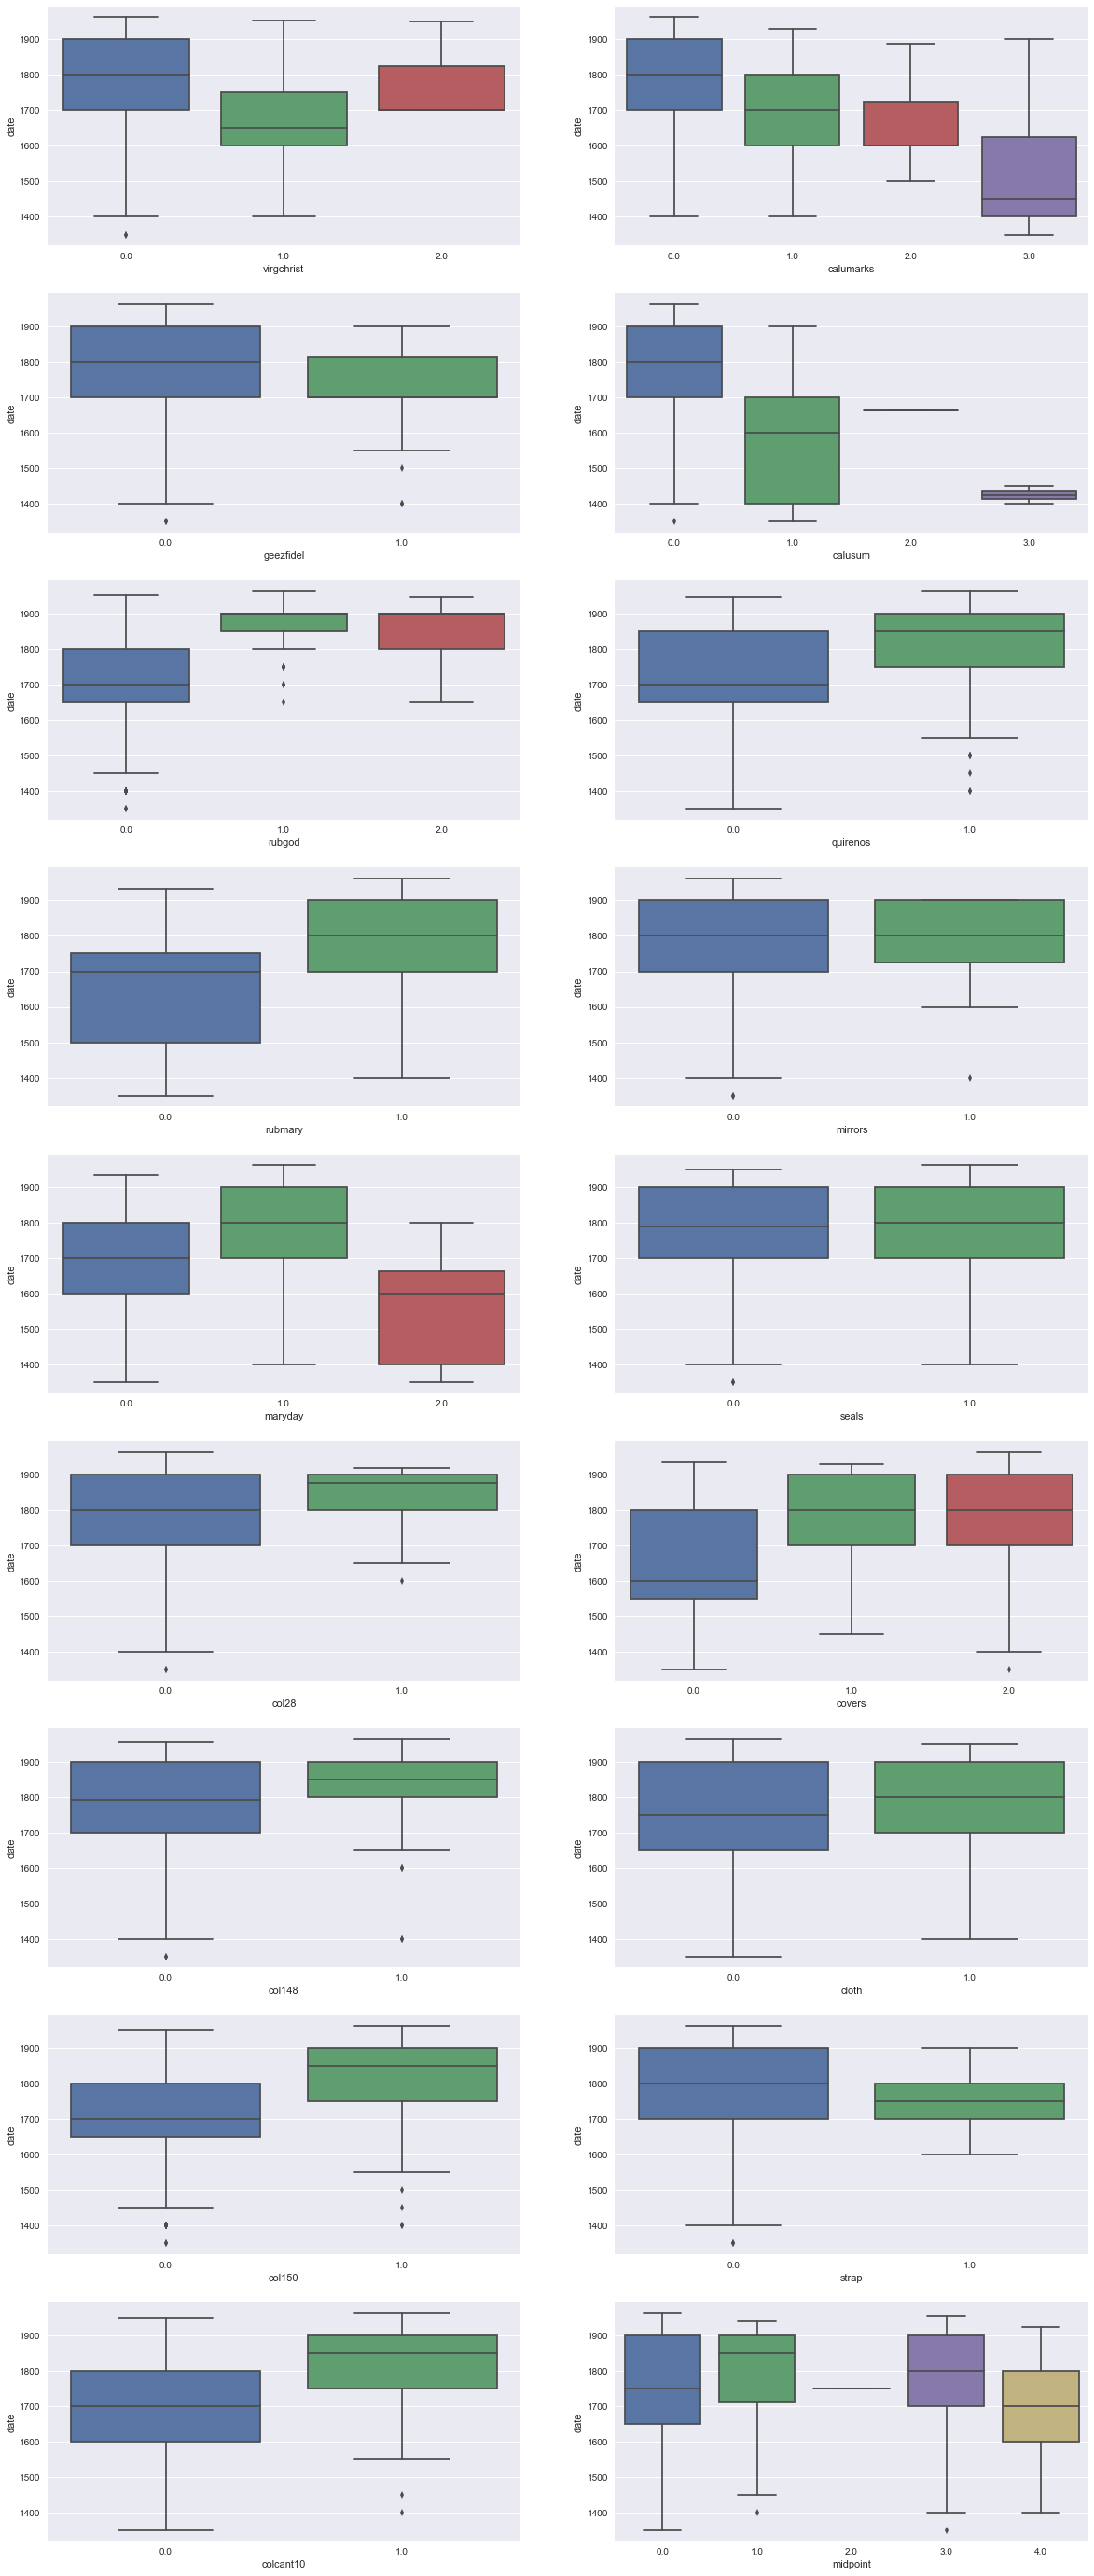

In [63]:
fig, axes = plt.subplots(9,2,figsize=(20,50))
ax1 = sns.boxplot(x='virgchrist', y='date', data=pslt, ax=axes[0,0])
ax2 = sns.boxplot(x='geezfidel', y='date', data=pslt, ax=axes[1,0])
ax3 = sns.boxplot(x='rubgod', y='date', data=pslt, ax=axes[2,0])
ax4 = sns.boxplot(x='rubmary', y='date', data=pslt, ax=axes[3,0])
ax5 = sns.boxplot(x='maryday', y='date', data=pslt, ax=axes[4,0])
ax6 = sns.boxplot(x='col28', y='date', data=pslt, ax=axes[5,0])
ax7 = sns.boxplot(x='col148', y='date', data=pslt, ax=axes[6,0])
ax8 = sns.boxplot(x='col150', y='date', data=pslt, ax=axes[7,0])
ax9 = sns.boxplot(x='colcant10', y='date', data=pslt, ax=axes[8,0])
ax10 = sns.boxplot(x='calumarks', y='date', data=pslt, ax=axes[0,1])
ax11 = sns.boxplot(x='calusum', y='date', data=pslt, ax=axes[1,1])
ax12 = sns.boxplot(x='quirenos', y='date', data=pslt, ax=axes[2,1])
ax13 = sns.boxplot(x='mirrors', y='date', data=pslt, ax=axes[3,1])
ax14 = sns.boxplot(x='seals', y='date', data=pslt, ax=axes[4,1])
ax15 = sns.boxplot(x='covers', y='date', data=pslt, ax=axes[5,1])
ax16 = sns.boxplot(x='cloth', y='date', data=pslt, ax=axes[6,1])
ax17 = sns.boxplot(x='strap', y='date', data=pslt, ax=axes[7,1])
ax18 = sns.boxplot(x='midpoint', y='date', data=pslt, ax=axes[8,1])

plt.show()

Variables of signifance = virgchrist, calumarks, calusum, rubgod, rubmary, maryday, col150, colcant10, midpoint

In [58]:
F, p = stats.f_oneway(pslt['virgchrist'] == 0, pslt['virgchrist'] == 1, pslt['virgchrist'] == 2)
F, p

(3676.095318330886, 0.0)

In [69]:
for col in pslt[['virgchrist','maryday']].columns:
    print(col)
    print(stats.f_oneway(pslt[col] == 0, pslt[col] == 1, pslt[col] == 2))

virgchrist
F_onewayResult(statistic=3676.095318330886, pvalue=0.0)
maryday
F_onewayResult(statistic=2052.771937835937, pvalue=0.0)


In [71]:
for col in pslt[['geezfidel','quirenos', 'rubmary', 'mirrors', 'seals', 'col28', 'col148', 'cloth', 'col150', 'strap', 'colcant10']].columns:
    print(col)
    print(stats.ttest_ind(pslt[col] == 0, pslt[col] == 1))

geezfidel
Ttest_indResult(statistic=71.91955579053344, pvalue=0.0)
quirenos
Ttest_indResult(statistic=11.154837164067555, pvalue=8.119738263662775e-28)
rubmary
Ttest_indResult(statistic=-55.3481584576293, pvalue=0.0)
mirrors
Ttest_indResult(statistic=62.81831910443586, pvalue=0.0)
seals
Ttest_indResult(statistic=20.52877796259878, pvalue=9.54587816303422e-83)
col28
Ttest_indResult(statistic=70.96882908233654, pvalue=0.0)
col148
Ttest_indResult(statistic=52.74499768893007, pvalue=0.0)
cloth
Ttest_indResult(statistic=22.059870177784887, pvalue=1.2081064535468855e-93)
col150
Ttest_indResult(statistic=2.2715090953175685, pvalue=0.023257120829184578)
strap
Ttest_indResult(statistic=98.72974750812234, pvalue=0.0)
colcant10
Ttest_indResult(statistic=-6.6943945517812455, pvalue=3.0497687626459525e-11)


In [73]:
for col in pslt[['calumarks', 'calusum', 'midpoint']].columns:
    print(col)
    print(stats.f_oneway(pslt[col] == 0, pslt[col] == 1, pslt[col] == 2, pslt[col] == 3))

calumarks
F_onewayResult(statistic=1388.855340814864, pvalue=0.0)
calusum
F_onewayResult(statistic=10206.074277370222, pvalue=0.0)
midpoint
F_onewayResult(statistic=294.8858534125604, pvalue=8.831172595725325e-168)


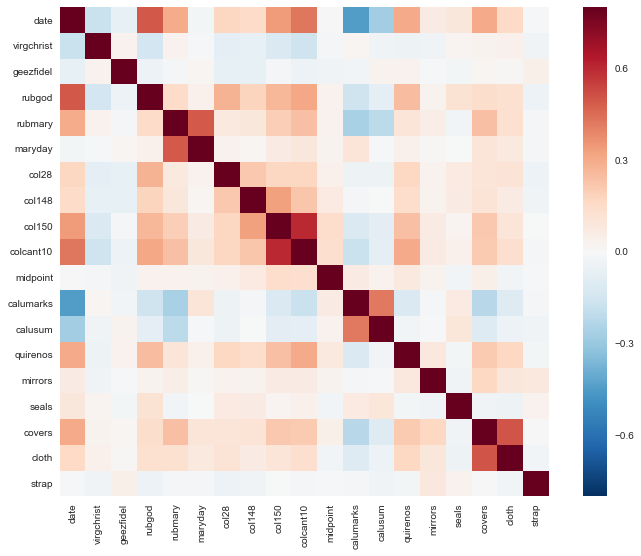

In [137]:
corrmat = pslt.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

pslt['col_10_150'] = pslt[['colcant10','col150']].mean(axis=1)
pslt['col_mary'] = pslt[['rubmary','maryday']].mean(axis=1)
pslt['cover_cloth'] = pslt[['covers','cloth']].mean(axis=1)

In [138]:
pslt.head()

,region,date,virgchrist,geezfidel,rubgod,rubmary,maryday,col28,col148,col150,...,calusum,quirenos,mirrors,seals,covers,cloth,strap,col_10_150,col_mary,cover_cloth
ID_1,,,,,,,,,,,,,,,,,,,,,
Berlin Or 172,NaN,1400.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Beta Metsahaf BGV-008,NaN,1900.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,0.5
Beta Metsahaf MNC-002,NaN,1900.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Beta Metsahaf MNC-015,NaN,1800.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.5
Beta Metsahaf MNC-017,NaN,1800.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0


In [166]:
# Select only numeric variables to scale.
pslt_num = pslt.loc[:,'virgchrist':'cover_cloth']

# Save the column names.
names=pslt_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
pslt_scaled = pd.DataFrame(preprocessing.scale(pslt_num), columns=names)

pslt_scaled['date'] = pslt['date'].values
pslt_scaled.describe()

,virgchrist,geezfidel,rubgod,rubmary,maryday,col28,col148,col150,colcant10,midpoint,...,quirenos,mirrors,seals,covers,cloth,strap,col_10_150,col_mary,cover_cloth,date
count,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,...,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,748.000000
mean,3.981744e-16,-5.261748e-16,3.888733e-16,6.436931e-17,1.116867e-16,-4.724353e-18,-1.889741e-16,-1.033452e-17,2.686976e-17,1.647618e-16,...,-2.249973e-16,-1.330201e-16,2.964532e-16,-4.879371e-17,-1.498506e-16,3.713046e-17,1.003925e-16,1.292554e-16,-2.254402e-16,1764.372995
std,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,...,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,129.028856
min,-2.984210e-01,-2.522880e-01,-6.311659e-01,-3.171565e+00,-2.649692e+00,-2.552564e-01,-3.278888e-01,-9.431051e-01,-1.187542e+00,-7.485273e-01,...,-7.527727e-01,-2.836543e-01,-6.019293e-01,-1.765275e+00,-5.814450e-01,-1.892424e-01,-1.188351e+00,-3.333457e+00,-1.516761e+00,1350.000000
25%,-2.984210e-01,-2.522880e-01,-6.311659e-01,3.153018e-01,1.293434e-01,-2.552564e-01,-3.278888e-01,-9.431051e-01,-1.187542e+00,-7.485273e-01,...,-7.527727e-01,-2.836543e-01,-6.019293e-01,-4.311175e-01,-5.814450e-01,-1.892424e-01,-1.188351e+00,2.450721e-01,-5.542257e-01,1700.000000
50%,-2.984210e-01,-2.522880e-01,-6.311659e-01,3.153018e-01,1.293434e-01,-2.552564e-01,-3.278888e-01,-9.431051e-01,8.420754e-01,-7.485273e-01,...,-7.527727e-01,-2.836543e-01,-6.019293e-01,-4.311175e-01,-5.814450e-01,-1.892424e-01,-6.285988e-02,2.450721e-01,-5.542257e-01,1800.000000
75%,-2.984210e-01,-2.522880e-01,9.943024e-01,3.153018e-01,1.293434e-01,-2.552564e-01,-3.278888e-01,1.060327e+00,8.420754e-01,1.386337e+00,...,1.328422e+00,-2.836543e-01,1.661325e+00,9.030403e-01,1.719853e+00,-1.892424e-01,1.062631e+00,2.450721e-01,4.083095e-01,1900.000000
max,6.400462e+00,3.963724e+00,2.619771e+00,3.153018e-01,2.908379e+00,3.917630e+00,3.049815e+00,1.060327e+00,8.420754e-01,2.097958e+00,...,1.328422e+00,3.525418e+00,1.661325e+00,9.030403e-01,1.719853e+00,5.284229e+00,1.062631e+00,2.034337e+00,1.370845e+00,1963.000000


In [173]:
pslt_dum = pd.get_dummies(pslt, drop_first=True)

In [174]:
list(pslt_dum)

['date',
 'virgchrist',
 'geezfidel',
 'rubgod',
 'rubmary',
 'maryday',
 'col28',
 'col148',
 'col150',
 'colcant10',
 'midpoint',
 'calumarks',
 'calusum',
 'quirenos',
 'mirrors',
 'seals',
 'covers',
 'cloth',
 'strap',
 'col_10_150',
 'col_mary',
 'cover_cloth',
 'region_Egypt',
 'region_Gojjam',
 'region_Shewa',
 'region_Tigray',
 'region_Wello']

In [177]:
pslt_scaled['region_Egypt'] = pslt_dum['region_Egypt'].values
pslt_scaled['region_Gojjam'] = pslt_dum['region_Gojjam'].values
pslt_scaled['region_Shewa'] = pslt_dum['region_Shewa'].values
pslt_scaled['region_Tigray'] = pslt_dum['region_Tigray'].values
pslt_scaled['region_Wello'] = pslt_dum['region_Wello'].values

In [178]:
list(pslt_scaled)

['virgchrist',
 'geezfidel',
 'rubgod',
 'rubmary',
 'maryday',
 'col28',
 'col148',
 'col150',
 'colcant10',
 'midpoint',
 'calumarks',
 'calusum',
 'quirenos',
 'mirrors',
 'seals',
 'covers',
 'cloth',
 'strap',
 'col_10_150',
 'col_mary',
 'cover_cloth',
 'date',
 'region_Egypt',
 'region_Gojjam',
 'region_Shewa',
 'region_Tigray',
 'region_Wello']

In [180]:
pslt_select = pslt_scaled[['date',
 'region_Egypt',
 'region_Gojjam',
 'region_Shewa',
 'region_Tigray',
 'region_Wello',
 'virgchrist',
 'geezfidel',
 'rubgod',
 'col28',
 'col148',
 'midpoint',
 'calumarks',
 'calusum',
 'quirenos',
 'mirrors',
 'seals',
 'strap',
 'col_10_150',
 'col_mary',
 'cover_cloth',
 ]]

In [181]:
list(pslt_select)

['date',
 'region_Egypt',
 'region_Gojjam',
 'region_Shewa',
 'region_Tigray',
 'region_Wello',
 'virgchrist',
 'geezfidel',
 'rubgod',
 'col28',
 'col148',
 'midpoint',
 'calumarks',
 'calusum',
 'quirenos',
 'mirrors',
 'seals',
 'strap',
 'col_10_150',
 'col_mary',
 'cover_cloth']

>After going through all the above selection processes, I have the following dataframe:

In [182]:
pslt_select.describe()

,date,region_Egypt,region_Gojjam,region_Shewa,region_Tigray,region_Wello,virgchrist,geezfidel,rubgod,col28,...,midpoint,calumarks,calusum,quirenos,mirrors,seals,strap,col_10_150,col_mary,cover_cloth
count,748.000000,752.000000,752.000000,752.000000,752.000000,752.000000,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,...,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02
mean,1764.372995,0.001330,0.027926,0.163564,0.109043,0.010638,3.981744e-16,-5.261748e-16,3.888733e-16,-4.724353e-18,...,1.647618e-16,-2.663354e-16,-1.425426e-16,-2.249973e-16,-1.330201e-16,2.964532e-16,3.713046e-17,1.003925e-16,1.292554e-16,-2.254402e-16
std,129.028856,0.036466,0.164869,0.370125,0.311900,0.102660,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,...,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00
min,1350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.984210e-01,-2.522880e-01,-6.311659e-01,-2.552564e-01,...,-7.485273e-01,-4.040122e-01,-1.709631e-01,-7.527727e-01,-2.836543e-01,-6.019293e-01,-1.892424e-01,-1.188351e+00,-3.333457e+00,-1.516761e+00
25%,1700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.984210e-01,-2.522880e-01,-6.311659e-01,-2.552564e-01,...,-7.485273e-01,-4.040122e-01,-1.709631e-01,-7.527727e-01,-2.836543e-01,-6.019293e-01,-1.892424e-01,-1.188351e+00,2.450721e-01,-5.542257e-01
50%,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.984210e-01,-2.522880e-01,-6.311659e-01,-2.552564e-01,...,-7.485273e-01,-4.040122e-01,-1.709631e-01,-7.527727e-01,-2.836543e-01,-6.019293e-01,-1.892424e-01,-6.285988e-02,2.450721e-01,-5.542257e-01
75%,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.984210e-01,-2.522880e-01,9.943024e-01,-2.552564e-01,...,1.386337e+00,-4.040122e-01,-1.709631e-01,1.328422e+00,-2.836543e-01,1.661325e+00,-1.892424e-01,1.062631e+00,2.450721e-01,4.083095e-01
max,1963.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.400462e+00,3.963724e+00,2.619771e+00,3.917630e+00,...,2.097958e+00,3.977967e+00,1.227074e+01,1.328422e+00,3.525418e+00,1.661325e+00,5.284229e+00,1.062631e+00,2.034337e+00,1.370845e+00


>I have selected date as my target variable. I seperated the categorical variable 'region' into dummies. I combined 'rubmary' and 'maryday', 'col150' and 'colcant10', and 'covers' and 'cloth' because these variables where closely correlated. I then scaled all of the variables except regions so that their values share the same range.

>Filtering methods

>filter using correlation with outcome variable - date

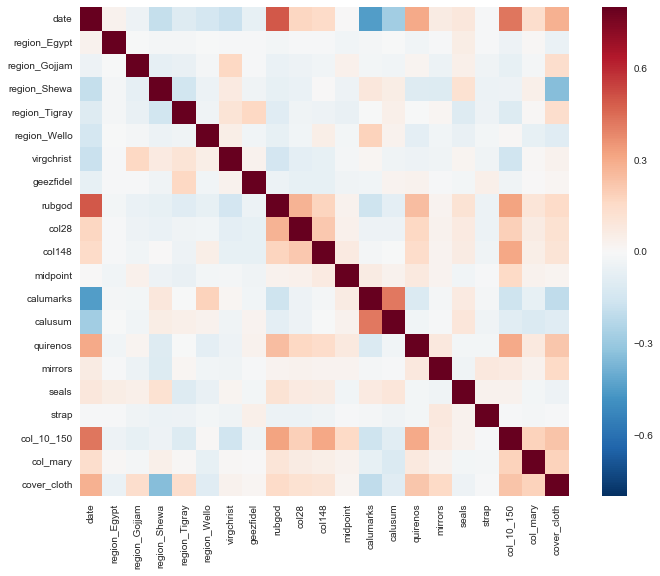

,date,region_Egypt,region_Gojjam,region_Shewa,region_Tigray,region_Wello,virgchrist,geezfidel,rubgod,col28,...,midpoint,calumarks,calusum,quirenos,mirrors,seals,strap,col_10_150,col_mary,cover_cloth
date,1.000000,0.032526,-0.043424,-0.191293,-0.104842,-0.137585,-0.178621,-0.063119,0.499333,0.172494,...,0.004999,-0.446161,-0.279225,0.301738,0.063141,0.090436,-0.009832,0.429122,0.139967,0.285714
region_Egypt,0.032526,1.000000,-0.006185,-0.016136,-0.012766,-0.003784,-0.010890,-0.009206,-0.023032,-0.009314,...,-0.027314,-0.014743,-0.006239,-0.027469,-0.010351,0.060623,-0.006906,-0.043364,0.008943,-0.055347
region_Gojjam,-0.043424,-0.006185,1.000000,-0.074951,-0.059295,-0.017576,0.165689,-0.008733,-0.054501,-0.043264,...,0.039693,-0.021321,-0.028977,0.023588,-0.048077,0.044113,-0.032075,-0.065158,-0.016227,0.139124
region_Shewa,-0.191293,-0.016136,-0.074951,1.000000,-0.154702,-0.045855,0.072748,-0.035777,-0.068728,-0.052867,...,-0.041904,0.089161,0.058590,-0.100931,-0.111740,0.124390,-0.044328,-0.039936,0.044046,-0.338517
region_Tigray,-0.104842,-0.012766,-0.059295,-0.154702,1.000000,-0.036277,0.109948,0.163557,-0.095981,-0.035890,...,-0.058451,-0.004243,0.046351,-0.005856,0.014522,-0.104365,-0.042853,-0.108422,0.009400,0.142843
region_Wello,-0.137585,-0.003784,-0.017576,-0.045855,-0.036277,1.000000,0.055885,-0.026161,-0.065449,-0.026469,...,-0.022275,0.185301,0.036028,-0.078059,-0.029414,-0.062417,-0.019624,0.008070,-0.067356,-0.094899
virgchrist,-0.178621,-0.010890,0.165689,0.072748,0.109948,0.055885,1.000000,0.037382,-0.144914,-0.076174,...,-0.014183,0.016057,-0.032547,-0.039248,-0.033751,0.021984,-0.032095,-0.159122,0.009379,0.036105
geezfidel,-0.063119,-0.009206,-0.008733,-0.035777,0.163557,-0.026161,0.037382,1.000000,-0.049879,-0.064398,...,-0.037238,-0.028226,0.026621,0.031777,-0.007497,-0.024972,0.044316,-0.034789,0.001641,0.016670
rubgod,0.499333,-0.023032,-0.054501,-0.068728,-0.095981,-0.065449,-0.144914,-0.049879,1.000000,0.280861,...,0.035157,-0.163438,-0.081013,0.244645,0.026802,0.114183,-0.048457,0.322809,0.104403,0.153684
col28,0.172494,-0.009314,-0.043264,-0.052867,-0.035890,-0.026469,-0.076174,-0.064398,0.280861,1.000000,...,0.041914,-0.038284,-0.043639,0.165858,0.033279,0.072414,-0.048305,0.190053,0.062556,0.120247


In [195]:
corrmat = pslt_select.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

In [200]:
 pslt_model = pslt_select[['date', 'rubgod','calumarks','col_10_150', 'quirenos', 'calusum']]

In [201]:
list(pslt_model)

['date', 'rubgod', 'calumarks', 'col_10_150', 'quirenos', 'calusum']

>Above I have used the filter method, specifically correlation between the independent variables and my target variable, to choose which variables to keep. I set my benchmark for correlation at +- .3; however, I included 'calusum' even thought its correlation with 'date' is only .279, since it is close to .3 and I wanted five variables to start. 